## Partie 1 : PageRank - version itérative, premier exemple

##### 1. Justifier pourquoi l’algorithme de la puissance iterérée permet de calculer le score de chacune des pages. 

Dans un premier temps il faut que la matrice symbolysant le web soit une matrice stochastique, c'est une matrice de probabilité ou la somme de chaque colonne doit être égal à 1, elle traduit la probabilité de se rendre sur une autre page depuis la page courante. En appliquant l'algorythme de puissance itértée sur celle-ci on obtient des vecteurs propre pour chaque point de la matrice. Ces vecteurs nous donne la probabilité de se retrouvé sur une page apres tant d'itération. Plus sa valeur est grande plus la page est fréquemment visité au cour des itérations.    



In [4]:
from random import randint
import numpy as np
from math import sqrt
import sympy as sp 

In [5]:
#fonction pour la norme
def norme(X:np.array):
    sum = 0 
    for x in X:
        sum += x**2
    return np.sqrt(sum)

V = np.array([2,0,0,3])
print(norme(V))

3.605551275463989


In [6]:

def puissanceItere(l,A:np.array):
   """Fonction qui applique l'algorithme de puissance itérée sur une matrice. 
   Matrice de toutes tailles, stochastique ou non"""
   X = np.array([randint(1,10) for x in range (A.shape[0])])
   Lambda = 0
   while (True):
       aLambda = Lambda
       AX = np.dot(A,X) # approximation du vecteur propre associé
       Lambda = norme(AX) # approximation de lambda
       X = AX / Lambda
       if (abs(Lambda - aLambda) < l ):
           return X,Lambda


C2 = np.array([[2, 3], [1, 0]])
X, Lambda = puissanceItere(1e-6, C2)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)
print("--------------------------------------")
C3 = np.array([[4,1,0], [1,3,1], [0,1,2]])
X, Lambda = puissanceItere(1e-6, C3)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)
print("--------------------------------------")
C4 = np.array([[4, 1, 0, 0],[1, 3, 1, 0],[0, 1, 2, 1],[0, 0, 1, 1]])
X, Lambda = puissanceItere(1e-6, C4)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)

Vecteur propre approximé : [0.94868331 0.31622773]
Valeur propre approximée : 3.00000021504873
--------------------------------------
Vecteur propre approximé : [0.7884718  0.57755352 0.21152814]
Valeur propre approximée : 4.732050371067712
--------------------------------------
Vecteur propre approximé : [0.77771013 0.57998962 0.23422484 0.06259161]
Valeur propre approximée : 4.745280689234338


##### 2. Implementer cet algorithme pour calculer le score de chacune des pages du graphe precedent. On verifiera que le vecteur de score obtenu est bien approximativement solution de r = Qr.


In [7]:
def stocastique (C:np.array) -> np.array:
    """renvoi la matice stocastique de C"""
    sum_col = C.sum(axis=0)     #somme des colonne dans un tableau
    sum_col[sum_col == 0] = 1   #si la somme vaut 0 on remplace par 1 pour eviter la division par 0 
    Q = C/sum_col               #divison de chaque valeur pas la somme de sa colonne
    return Q


In [8]:
def score(C:np.array,precision):
    Q = stocastique(C)
    #print ("C : ","\n",C)
    #print ("Q : ","\n",Q)
    r = np.array([1/C.shape[0] for i in range(C.shape[0])])
    while (True):
        r_copie = r
        r = np.dot(Q,r) # approximation du vecteur propre associé
        if ( np.allclose(r_copie, r, atol=precision)):
            return r
        


C = np.array([
    [0,1,1,1,1,0,1,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,1,0]
])

t = score (C,1e-6)
for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  0.13761783539830247
2 :  0.027523733949253455
3 :  0.03669838652216148
4 :  0.04587309429687282
5 :  0.059635154836846296
6 :  0.16513143092381713
7 :  0.05504320270122657
8 :  0.11008575366685683
9 :  0.05504320270122657
10 :  0.13761783539830247
11 :  0.02752373394925345
12 :  0.03669838652216147
13 :  0.04587309429687281
14 :  0.05963515483684628


##### 3. Analyser la pertinence du resultat obtenu.
Pour verifier mes resultats, étant donné que les vecteurs obtenue traduisent une probabilité il faut que la somme global soit d'environ 1. C'est le cas ce qui me laisse penser que les resultats sont corrects.
Ici on obtient le score de chaque noeuds (pages), on voit que le noeud 6 est celui avec le meilleur score ce sera donc la page la mieux classé par PageRank. Elle a le meilleur score car elle est celle vers qui les liens pointe le plus. L'importance de ses enfants lui donne la plus grand importance global.

## Partie 2 : PageRank - version itérative, deuxième exemple

##### 1. Appliquer l’algorithme de la Partie 1 au graphe suivant et commenter le resultat obtenu
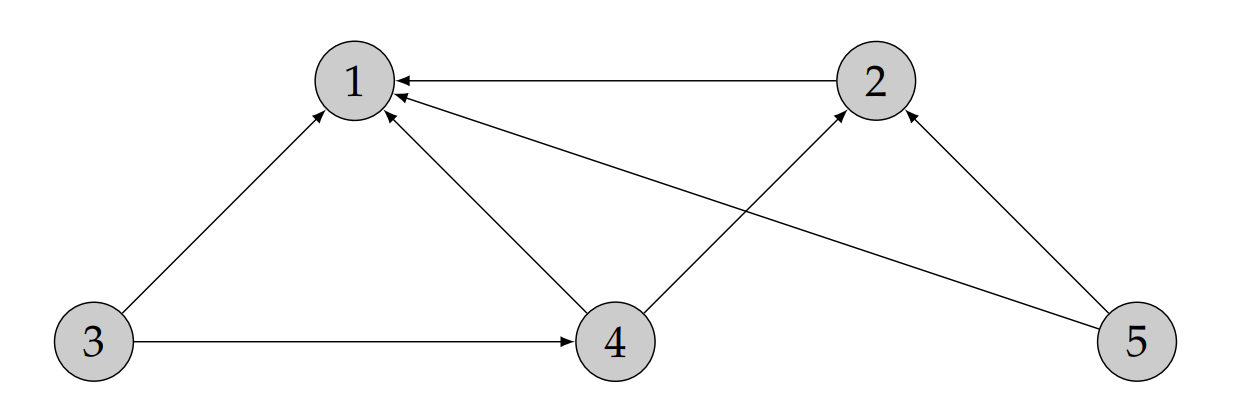


In [9]:
B = np.array([
    [0,1,1,1,1],
    [0,0,0,1,1],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0]
])

b = score (B,1e-6)
sum = 0 
for i in range (len(b)):
    print (i+1,": ",b[i])
    sum += b[i]
print("somme ",sum)

1 :  0.0
2 :  0.0
3 :  0.0
4 :  0.0
5 :  0.0
somme  0.0


##### 2.  En utilisant cette matrice de transition (avec α = 0, 85), calculer les scores de chacune des pages du graphe precedent. Commenter. On verifiera que le vecteur de score obtenu est bien approximativement solution de r = Pr

In [10]:
def matriceAmortie(C:np.array,alpha) -> np.array:
    """ 
    C = matrice d'adjacence déjà transposé
    alpha = facteur d'amortissement
    Renvoi une matrice P qui est la matrice de transition de C
    """
    Q = stocastique(C)                                                      # calcul de la stocastique de C dans Q
    sum_col = Q.sum(axis=0)                                                 # somme de chaque colonne de Q dans sum_col
    P = np.where(sum_col==0 ,1/C.shape[0],alpha * Q + (1-alpha)/C.shape[0]) # mettre la somme de toutes les colonnes à 1  
    return P


In [11]:
def score_amortie(C:np.array,precision,alpha= 0.85):
    P = matriceAmortie(C,alpha)
    r = np.array([1/C.shape[0] for i in range(C.shape[0])])
    while (True):
        r_copie = r
        r = np.dot(P,r) # approximation du vecteur propre associé
        if ( np.allclose(r_copie, r, atol=precision)):
            return r

Q = np.array([
    [0.5, 0.5],
    [0.5, 0.5]
])
#q = score_amortie (Q,1e-6)
b = score_amortie(B,1e-6)
sum = 0 
for i in range (len(b)):
    print (i+1,": ",b[i])
    sum += b[i]
print("somme ",sum)

1 :  0.43390394332051885
2 :  0.2107048673770953
3 :  0.10376389257979571
4 :  0.14786340414279514
5 :  0.10376389257979571
somme  1.0000000000000007


## Partie 3 : PageRank - version itérative, analyse

##### 1. Analyser l’influence du critere d’arret dans l’algorithme de la puissance iteree.

Dans l'algorithme de puissance itéré le critère d'arrêt permet de determiner à quel moment les changements entre deux derivées sont si faibles qu'ils sont négligablent. Plus le critere d'arret est petit plus l'algorithme sera precis sur le score des pages, le point négatif sera qu'il effectura beaucoup plus de calcul et sera donc plus lourd et plus long.

##### 2.Ajouter quelques hubs (pages qui ont beaucoup de liens sortant) et autorites (pages qui ont beaucoup de liens entrant). Commenter l’impact sur les scores


On se rend compte que si on ajoute un HUB, ici 15, qui pointe vers diverses autres noeuds mais qui n'est jamais pointé, alors son score sera très bas ce qui impact tres peu les scores des autres pages. 
A l'inverse ajouter une autortié, ici 16, qui est reférencé par une tres grande quantité d'autres noeuds changera les scores des page le referencant. Chaque page qui le pointe diminu son propre score et augmente celui de 16.     

In [12]:
C_bis = np.array([
    [0,1,1,1,1,0,1,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,1,1,0,1,0,0,0,0,0,1],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1,0,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])

b = score_amortie (C_bis,1e-6)
for i in range (len(b)):
    print (i+1,": ",b[i])

1 :  0.1371008717898248
2 :  0.03330722170407541
3 :  0.04274427887921188
4 :  0.05147359498705918
5 :  0.06632063570007302
6 :  0.1351640311439062
7 :  0.0499960367064042
8 :  0.09249261813343178
9 :  0.0499960367064042
10 :  0.13669838971194653
11 :  0.03493882598437109
12 :  0.04313818058328235
13 :  0.0515726270019597
14 :  0.06505665096805073
15 :  0.010000000000000012


##### 3. Essayez d’accroître le score de certaines pages. Expliquez votre méthode et validez-la experimentalement

On a fait en sorte que chaque page soit pointée et pointe une autre page. Donc chaque page peut être accessible depuis toutes les pages. On a rajouté un lien de 6 à 10, de 6 à 1 et de 5 à 11.
6 étant la page la plus importante, elle a transmis son score aux pages 1 et 10 qui ont donc gagné en importance, au détriment de la page 6 qui en a perdu. La page 5 pointait uniquement vers la page 1 et transmet donc maintenant une partie de son importance à la page 11, tout en perdant un peu de son importance.

##### 4. Faites varier le facteur d’amortissement α pour analyser son influence. On rappelle que α ∈ [0, 1] 

Le facteur d'amortissement traduit le hasard de passer d'une page a l'autre. Plus le facteur d'amortissement est proche de 1 plus on considere que l'on peut se déplacer qu'entre deux pages ayant un lien. Alors que si le facteur d'amortiessent est 0 on considere que les liens n'ont aucunes instances sur le score de la page. 

In [13]:
t = score_amortie (C,1e-6,0)
for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  0.07142857142857142
2 :  0.07142857142857142
3 :  0.07142857142857142
4 :  0.07142857142857142
5 :  0.07142857142857142
6 :  0.07142857142857142
7 :  0.07142857142857142
8 :  0.07142857142857142
9 :  0.07142857142857142
10 :  0.07142857142857142
11 :  0.07142857142857142
12 :  0.07142857142857142
13 :  0.07142857142857142
14 :  0.07142857142857142


In [14]:
t = score_amortie (C,1e-6,1)
for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  0.13761783539830247
2 :  0.027523733949253455
3 :  0.03669838652216148
4 :  0.04587309429687282
5 :  0.059635154836846296
6 :  0.16513143092381713
7 :  0.05504320270122657
8 :  0.11008575366685683
9 :  0.05504320270122657
10 :  0.13761783539830247
11 :  0.02752373394925345
12 :  0.03669838652216147
13 :  0.04587309429687281
14 :  0.05963515483684628


## Partie 4 : PageRank - version itérative, analyse

##### 1. En utilisant le logiciel d’exploration de site web present sur la page Ametice, construire trois matrices de votre choix et appliquez l’algorithme de PageRank a ces matrices. L’ordre de ces matrices sera compris entre 10 et 30. Ces matrices, le resultat du logiciel d’exploration ainsi que le site web choisi apparaıtront clairement dans le dossier.

Après avoir tester un grand nombre de site web nous avons trouver pertinant de choisir le site de base de donnée en ligne de supabase (supabase.com), car chaque page trouvé dans celle ci ont des scores plus ou moins différents. On choisit de faire une matrice de 10, 20,puis 30. 

Pour l'interpretation de nos ressultats nous implementons une fonction qui renvoi une liste decroissant du score de chacun des noeuds, ainsi la valeur à l'indice 0 nous donnera la page la mieux referencé par PageRank  

In [15]:
"""le logiciel fournit renvoi une matrice d'adjacence, 
il faut donc la transposé grace à la méthode .T"""
supabase10 = np.array([
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,1,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1]
])
print(supabase10.T, "\n")               # Affichage de la transposé 
t = score_amortie (supabase10.T,1e-6)   # Affichage des scores des pages 
for i in range (len(t)):
    print (i+1,": ",t[i])

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [0 0 0 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 1 1 1]] 

1 :  0.21298955204278575
2 :  0.09983865371779413
3 :  0.12812637829904203
4 :  0.016564422770159473
5 :  0.09983865371779413
6 :  0.015000000000000001
7 :  0.09983865371779413
8 :  0.09983865371779413
9 :  0.09983865371779412
10 :  0.12812637829904203


In [16]:

supabase20 = np.array([
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]
])

print(len(supabase20[0])==supabase20.shape[0])

t = score_amortie (supabase20,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

True
1 :  0.03975428163992574
2 :  0.03975428163992574
3 :  0.09162373661848985
4 :  0.10461727327250324
5 :  0.03975428163992574
6 :  0.04831156720463672
7 :  0.009278512020167204
8 :  0.023067450815414663
9 :  0.03975428163992574
10 :  0.03975428163992574
11 :  0.03975428163992574
12 :  0.03975428163992574
13 :  0.03975428163992574
14 :  0.03975428163992574
15 :  0.012946788263775372
16 :  0.07047322740913653
17 :  0.07047322740913653
18 :  0.07047322740913653
19 :  0.07047322740913653
20 :  0.07047322740913653


In [17]:
supabase30 = np.array([
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1], 
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],   
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
])

print(len(supabase30[0])==supabase30.shape[0])

t = score_amortie (supabase30,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

True
1 :  0.025213337644381398
2 :  0.025213337644381398
3 :  0.025213337644381398
4 :  0.07689355587836003
5 :  0.025213337644381398
6 :  0.02899469818731322
7 :  0.006535941612970296
8 :  0.013728436807858544
9 :  0.025213337644381398
10 :  0.025213337644381398
11 :  0.025213337644381398
12 :  0.025213337644381398
13 :  0.025213337644381398
14 :  0.025213337644381398
15 :  0.011366963336747558
16 :  0.053385138123171645
17 :  0.053385138123171645
18 :  0.053385138123171645
19 :  0.053385138123171645
20 :  0.053385138123171645
21 :  0.053385138123171645
22 :  0.053385138123171645
23 :  0.053385138123171645
24 :  0.053385138123171645
25 :  0.053385138123171645
26 :  0.025213337644381398
27 :  0.025213337644381398
28 :  0.007796653100491574
29 :  0.009136159055982933
30 :  0.009136159055982933


##### 2. Sur la page Ametice vous trouverez les matrices du reseau routier (issues de OpenStreet Map) de differentes villes. Chaque groupe étudiera la matrice “413 Avenue Gaston Berger” ainsi que la ville qui lui a eté affectée.

In [18]:
Gaston_Berger = np.load("413 avenue Gaston Berger, Aix en Provence, France_Matrice.npy")

t = score_amortie (Gaston_Berger,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

print(type(t))
print(t.shape)
t = t.reshape(-1,1)
print(t.shape)


1 :  0.0005991480330293873
2 :  0.0006537429228383005
3 :  0.0005162681011770742
4 :  0.0007288819947886456
5 :  0.0008706899068152689
6 :  0.0013083882513737336
7 :  0.0006373482087544043
8 :  0.001335642001710301
9 :  0.0008054269260376648
10 :  0.0007554035809727118
11 :  0.0007001092605901657
12 :  0.0007094857160612738
13 :  0.00037446633162384785
14 :  0.0009358080001364373
15 :  0.0007907811271792506
16 :  0.0007608246282005519
17 :  0.0009021183982086892
18 :  0.0005839469335755534
19 :  0.000817783303635374
20 :  0.0006045851502684792
21 :  0.00028260264380829684
22 :  0.0013694601371988227
23 :  0.0008727793645338293
24 :  0.0009828029815992254
25 :  0.0005626343965262685
26 :  0.0007942821911306702
27 :  0.000823055052749676
28 :  0.0008230584112385783
29 :  0.000810807027588535
30 :  0.0008126604715928261
31 :  0.0008283349199154791
32 :  0.0006734249769273342
33 :  0.0006470183059277965
34 :  0.0009820034658882025
35 :  0.0007610622137566141
36 :  0.000843699049194792
37 :

In [19]:
M = np.load("413 avenue Gaston Berger, Aix en Provence, France_Id_Noeud.npy")
print(M)
print(M.shape[0])
print(len(M))
print(M[0])
print(type(M[1]))

[  12156118   12156297   12156309 ... 9406109696 9481625757 9501232881]
1259
1259
12156118
<class 'numpy.int64'>


In [20]:

supabase20 = np.array([
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]
])

print(len(supabase20[0])==supabase20.shape[0])

t = score_amortie (supabase20,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

True
1 :  0.03975428163992574
2 :  0.03975428163992574
3 :  0.09162373661848985
4 :  0.10461727327250324
5 :  0.03975428163992574
6 :  0.04831156720463672
7 :  0.009278512020167204
8 :  0.023067450815414663
9 :  0.03975428163992574
10 :  0.03975428163992574
11 :  0.03975428163992574
12 :  0.03975428163992574
13 :  0.03975428163992574
14 :  0.03975428163992574
15 :  0.012946788263775372
16 :  0.07047322740913653
17 :  0.07047322740913653
18 :  0.07047322740913653
19 :  0.07047322740913653
20 :  0.07047322740913653


In [21]:
supabase30 = np.array([
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1], 
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],   
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
])

print(len(supabase30[0])==supabase30.shape[0])

t = score_amortie (supabase30,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

True
1 :  0.025213337644381398
2 :  0.025213337644381398
3 :  0.025213337644381398
4 :  0.07689355587836003
5 :  0.025213337644381398
6 :  0.02899469818731322
7 :  0.006535941612970296
8 :  0.013728436807858544
9 :  0.025213337644381398
10 :  0.025213337644381398
11 :  0.025213337644381398
12 :  0.025213337644381398
13 :  0.025213337644381398
14 :  0.025213337644381398
15 :  0.011366963336747558
16 :  0.053385138123171645
17 :  0.053385138123171645
18 :  0.053385138123171645
19 :  0.053385138123171645
20 :  0.053385138123171645
21 :  0.053385138123171645
22 :  0.053385138123171645
23 :  0.053385138123171645
24 :  0.053385138123171645
25 :  0.053385138123171645
26 :  0.025213337644381398
27 :  0.025213337644381398
28 :  0.007796653100491574
29 :  0.009136159055982933
30 :  0.009136159055982933


##### 2. Sur la page Ametice vous trouverez les matrices du reseau routier (issues de OpenStreet Map) de differentes villes. Chaque groupe étudiera la matrice “413 Avenue Gaston Berger” ainsi que la ville qui lui a eté affectée.

In [22]:
def classement(noeud:np.array,score:np.array):
    corres = {}
    for i in range(len(noeud)):
        corres[noeud[i]] = score[i]
    sorted_corres = dict(sorted(corres.items(), key=lambda item: item[1],reverse=True))
    return list(sorted_corres.keys())


In [67]:
Gaston_Berger = np.load("413 avenue Gaston Berger, Aix en Provence, France_Matrice.npy")
Gaston_Berger = Gaston_Berger.T
id_Gaston_Berger = np.load("413 avenue Gaston Berger, Aix en Provence, France_Id_Noeud.npy")
score = score_amortie(Gaston_Berger,1e-6)
t = classement(id_Gaston_Berger,score)

for i in range(len(t)):
    print(f"{i+1} : {t[i]} : https://www.openstreetmap.org/node/{t[i]}") 


1 : 5672603788 : https://www.openstreetmap.org/node/5672603788
2 : 9196449217 : https://www.openstreetmap.org/node/9196449217
3 : 7251343585 : https://www.openstreetmap.org/node/7251343585
4 : 33706402 : https://www.openstreetmap.org/node/33706402
5 : 1840330051 : https://www.openstreetmap.org/node/1840330051
6 : 7304213674 : https://www.openstreetmap.org/node/7304213674
7 : 1840330044 : https://www.openstreetmap.org/node/1840330044
8 : 34550845 : https://www.openstreetmap.org/node/34550845
9 : 33707108 : https://www.openstreetmap.org/node/33707108
10 : 302864793 : https://www.openstreetmap.org/node/302864793
11 : 4836722465 : https://www.openstreetmap.org/node/4836722465
12 : 304010763 : https://www.openstreetmap.org/node/304010763
13 : 5323321826 : https://www.openstreetmap.org/node/5323321826
14 : 34552857 : https://www.openstreetmap.org/node/34552857
15 : 1837997824 : https://www.openstreetmap.org/node/1837997824
16 : 12162239 : https://www.openstreetmap.org/node/12162239
17 : 3108

In [66]:
def score_j (P) :
    taille = len(P)
    I = np.identity(taille)
    M = I - P
    M[-1,:] = 1
    b = np.zeros(taille)
    b[taille - 1] = 1
    R = np.linalg.solve(M,np.array(b))
    return R


A = np.array([
    [4,1],
    [2,3]
])
B = np.array([
    [2,0],
    [0,2]
])
C = np.array([
    [0,1],
    [-2,3]
])
D = np.array([
    [1,2],
    [2,1]
])

E = np.array([
    [4,1,6],
    [2,3,1],
    [1,2,3]
])
F = np.array([
    [4,1,6],
    [2,3,1],
    [1,2,3]
])
print("coeff A",score_j(stocastique(A)),"\n")
#print("coeff B" ,score_j(stocastique(B)),"\n")
print("coeff C" ,score_j(stocastique(C)),"\n")
print("coeff D" ,score_j(stocastique(D)),"\n")
print("coeff E" ,score_j(stocastique(E)),"\n")
print("coeff F" ,score_j(stocastique(F)),"\n")
print("test grand",score_j(stocastique(Gaston_Berger)))

coeff A [0.42857143 0.57142857] 

coeff C [0.2 0.8] 

coeff D [0.5 0.5] 

coeff E [0.45392491 0.30716724 0.23890785] 

coeff F [0.45392491 0.30716724 0.23890785] 

test grand [ 0.00000000e+00  7.16586566e-17  2.71426380e-18 ... -8.19143828e-17
  5.68641985e-17  8.73281014e-17]


In [65]:
import numpy as np
from scipy.linalg import null_space

def score_j_par_nullspace(P):
    I = np.identity(len(P))
    M = I - P
    
    # Calcul du noyau de M = I - P
    null = null_space(M)
    print (null)

    if null.shape[1] == 0:
        raise ValueError("Pas de vecteur propre trouvé (nullspace vide)")

    # Prendre le premier vecteur propre non nul (colonne 0 du nullspace)
    R = null[:, 0]

    # Normaliser pour que la somme soit 1 (probabilités)

    # Si les valeurs sont toutes négatives (possible), on prend l'opposé
    if np.all(R < 0):
        R = -R

    return R


A = np.array([
    [4,1],
    [2,3]
])
B = np.array([
    [2,0],
    [0,2]
])
C = np.array([
    [0,1],
    [-2,3]
])
D = np.array([
    [1,2],
    [2,1]
])


E = np.array([
    [4,1,6],
    [2,3,1],
    [1,2,3]
])
F = np.array([
    [4,1,6],
    [2,3,1],
    [1,2,3]
])

print("coeff A",score_j_par_nullspace(stocastique(A)),"\n")
print("coeff B" ,score_j_par_nullspace(stocastique(B)),"\n")
print("coeff C" ,score_j_par_nullspace(stocastique(C)),"\n")
print("coeff D" ,score_j_par_nullspace(stocastique(D)),"\n")
print("coeff E" ,score_j_par_nullspace(stocastique(E)),"\n")
print("coeff F" ,score_j_par_nullspace(stocastique(F)),"\n")
print("test grand",score_j_par_nullspace(stocastique(Gaston_Berger)))

[[0.6]
 [0.8]]
coeff A [0.6 0.8] 

[[1. 0.]
 [0. 1.]]
coeff B [1. 0.] 

[[-0.24253563]
 [-0.9701425 ]]
coeff C [0.24253563 0.9701425 ] 

[[0.70710678]
 [0.70710678]]
coeff D [0.70710678 0.70710678] 

[[0.75920712]
 [0.51374918]
 [0.39958269]]
coeff E [0.75920712 0.51374918 0.39958269] 

[[0.75920712]
 [0.51374918]
 [0.39958269]]
coeff F [0.75920712 0.51374918 0.39958269] 

[[ 0.00000000e+00]
 [-3.02895812e-17]
 [ 9.11122960e-17]
 ...
 [ 1.01183204e-15]
 [ 6.59300420e-16]
 [ 4.85497050e-16]]
test grand [ 0.00000000e+00 -3.02895812e-17  9.11122960e-17 ...  1.01183204e-15
  6.59300420e-16  4.85497050e-16]


In [36]:
def calcul_direct(A:np.array):
    A = sp.Matrix(A)
    lambda_ = sp.symbols('lambda')
    I = np.eye(A.shape[0]) 
    taille = len(A)
    polynome = (A - lambda_ * I).det()
    #polynome_caracteristique = polynome.det()
    #print (polynome_caracteristique)
    coeff = sp.Poly(polynome, lambda_).all_coeffs()
    coeff = [float(coeff)for coeff in coeff]
    #print (coeff)
    #delta = coeff[1]**2 - 4 * coeff[0]*coeff[2]
    #racinesperso =((-coeff[1] + sqrt(delta)) / (2*coeff[0]) )
    racines =np.sort(np.roots(coeff))
    print(racines)
    M = np.array(A - racines[-1] * I,dtype=np.float64)
    M = M.reshape((int(sqrt(len(A))),int(sqrt(len(A)))))
    print(M)
    #M = np.array([
    #    [-1 , 1],
    #   [ 2, -2]
    #])
    #x = sp.symbols('x')
    #y = sp.symbols('y')
    #systeme = M[0][0]*x + M[0][1]*y
    #R = sp.Poly(systeme,x).all_coeffs()
    #R = abs(M[0][0]),abs(M[0][1])               # abs n'est pas satisfaisant ici
    b = np.zeros(taille)
    R = np.linalg.solve(M,np.array(b))
    return R
    

A = np.array([
    [4,1],
    [2,3]
])
B = np.array([
    [2,0],
    [0,2]
])
C = np.array([
    [0,1],
    [-2,3]
])
D = np.array([
    [1,2],
    [2,1]
])


print("coeff A",calcul_direct(A),"\n")
print("coeff B" ,calcul_direct(B),"\n")
print("coeff C" ,calcul_direct(C),"\n")
print("coeff C" ,calcul_direct(D),"\n")


[2. 5.]
[[-1.  1.]
 [ 2. -2.]]


ValueError: solve1: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m)->(m) (size 4 is different from 2)

In [82]:
ABC = sp.Matrix([
    [4,1,6],
    [2,3,1],
    [1,2,3]
])
print(calcul_direct(AB))
ab = np.array([
    [4,1,6],
    [2,3,1],
    [1,2,3]
])
a,b =puissanceItere(1e-6,ab)
print(a,b)

[2.21483245682313 1]
[0.80533638 0.45057925 0.38524234] 7.429663662273329


In [43]:
M = np.array([
        [2 , 0],
        [ 0, -2]
    ])
b = np.array([0,0])
R = np.linalg.solve(M,b)
print (R)

[ 0. -0.]
